In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

C:\Users\1vany\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,...,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,...,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,...,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,...,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,...,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [6]:
df.describe()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,...,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
count,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,...,279792.000000,265196.000000,252558.000000,263084.000000,249624.000000,263553.000000,250155.000000,279792.000000,279792.000000,279792.000000
mean,54.364078,47.763540,2.709084,40.605146,81.596171,133.285458,0.037442,0.885701,2.046467,3.748163,...,30.110661,2042.541716,644.610557,7.051233,7.360464,1967.532599,1967.988580,507.833604,54.974088,0.016058
std,4.245713,17.044625,4.202451,53.293388,105.193169,172.290136,0.391014,6.858338,14.801566,25.679859,...,27.686234,1359.884747,445.699329,3.542084,4.231369,45.807699,54.110015,1704.251771,47.856417,0.125700
min,42.651897,19.892178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.100000,10.000000,0.000000
25%,53.226600,37.582988,0.000000,7.000000,16.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,932.000000,290.000000,4.591837,4.619959,1960.070000,1959.890097,65.900000,10.000000,0.000000
50%,55.679090,39.702435,1.000000,22.000000,46.000000,77.000000,0.000000,0.000000,0.000000,0.000000,...,25.000000,1949.000000,602.000000,6.368932,6.395349,1970.890411,1971.647059,128.737034,10.000000,0.000000
75%,56.306976,55.957523,4.000000,51.000000,101.000000,164.000000,0.000000,0.000000,1.000000,2.000000,...,43.000000,2978.000000,936.000000,8.698925,9.100000,1983.701754,1986.950000,336.000000,110.000000,0.000000
max,69.500740,151.777000,46.000000,468.000000,851.000000,1392.000000,30.000000,586.000000,949.000000,1162.000000,...,289.000000,18392.000000,6105.000000,53.717949,221.666667,2019.000000,2020.000000,40000.000000,110.000000,1.000000


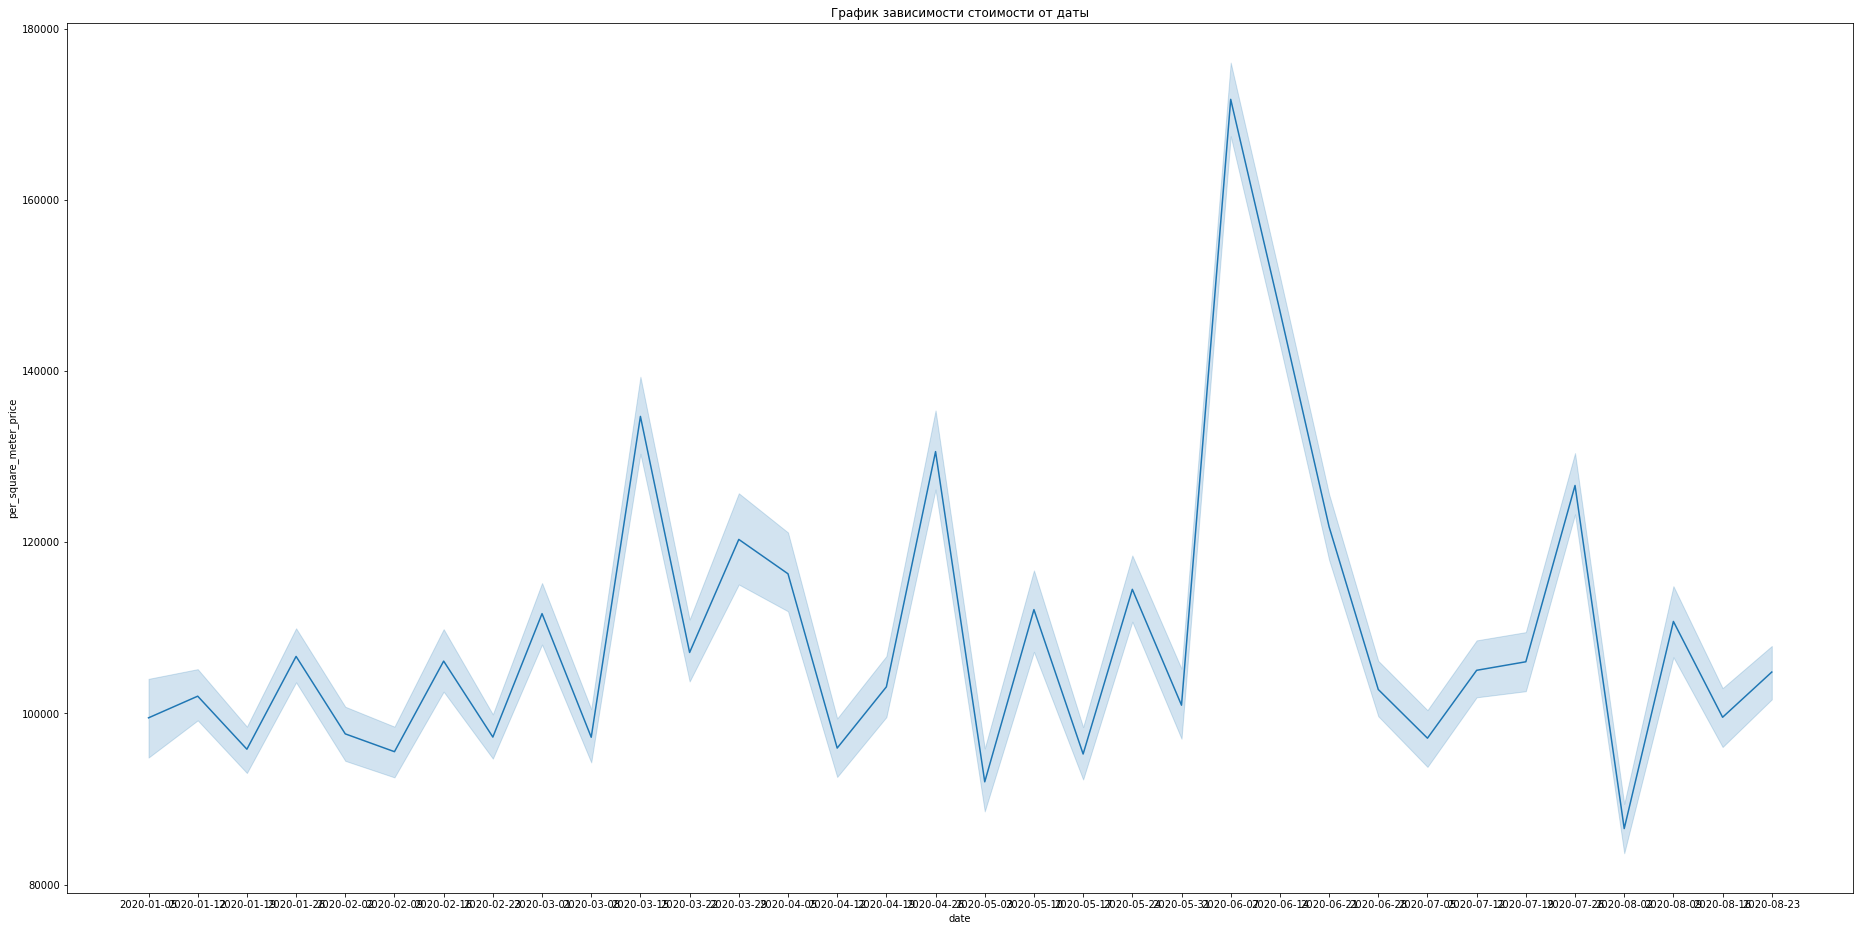

In [7]:
fig, ax = plt.subplots(1, figsize=(32,16))
plt.title('График зависимости стоимости от даты')
sns.lineplot(data=df, x='date', y='per_square_meter_price', ax=ax);

Сезонность временного ряда не наблюдается

In [8]:
df.shape

(279792, 77)

In [9]:
features_with_nan = [feature for feature in df. columns if df[feature].isnull().sum()>1]

Выведем признаки имеющие пропуски с информацией о доли пропусков 

In [10]:
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100, 2), '% missing')

floor 62.99 % missing
osm_city_nearest_population 0.02 % missing
reform_house_population_1000 5.22 % missing
reform_house_population_500 9.73 % missing
reform_mean_floor_count_1000 5.97 % missing
reform_mean_floor_count_500 10.78 % missing
reform_mean_year_building_1000 5.8 % missing
reform_mean_year_building_500 10.59 % missing
street 0.57 % missing


Отбросим колонку признак floor, так как более половины записей имеет пропуск по данной характеристики и она недостаточно значима для восстановления

In [10]:
X_df, y_series = df.drop(['floor', 'per_square_meter_price'], axis=1), df['per_square_meter_price']

Численные характеристики

In [11]:
numerical_feat=[features for features in X_df.columns if X_df[features].dtypes!='O']
print('The number of numerical features are', len(numerical_feat))

The number of numerical features are 69


In [21]:
X_df[numerical_feat].head()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,...,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
0,57.998207,56.292797,4,19,35,52,0,0,0,0,...,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,32.0,10,0
1,55.574284,39.543835,3,24,37,59,0,0,0,1,...,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,280.0,10,0
2,57.619140,39.850525,1,30,67,128,0,0,1,1,...,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,297.4,110,0
3,53.897083,87.108604,0,0,5,21,0,0,0,1,...,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,190.0,110,0
4,55.802590,37.487110,1,23,64,153,0,1,1,1,...,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,60.2,10,0


In [12]:
# Количество дискретных признаков
discrete_feat=[feature for feature in numerical_feat if len(X_df[feature].unique())<25]
print(len(discrete_feat))

9


In [38]:
# Непрерывные признаки
continous_feat = []
for i in numerical_feat:
    if i not in discrete_feat:
        continous_feat.append(i)

In [24]:
X_df[discrete_feat].head()

,osm_catering_points_in_0.001,osm_crossing_points_in_0.001,osm_culture_points_in_0.001,osm_finance_points_in_0.001,osm_offices_points_in_0.001,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,realty_type,price_type
0,0,3,0,0,0,0,0,10,0
1,0,0,0,0,0,0,0,10,0
2,0,0,0,0,0,0,0,110,0
3,0,0,0,0,0,0,0,110,0
4,0,0,0,0,0,0,0,10,0


Далее представлено распределение целевого признака в зависимости от непрерывных признаков

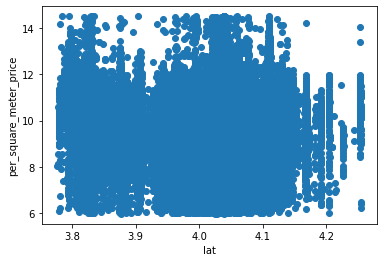

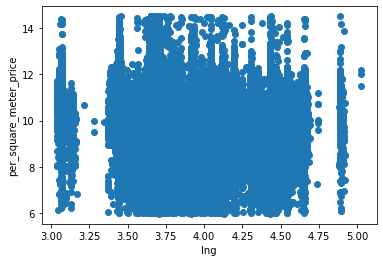

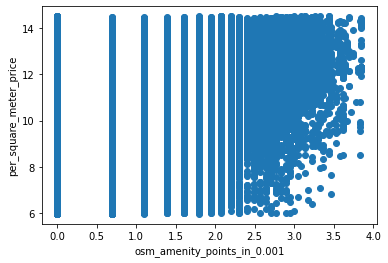

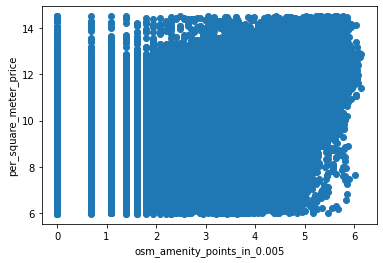

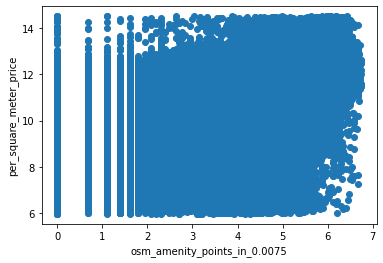

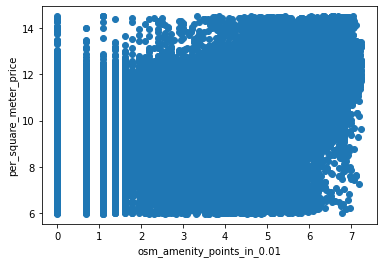

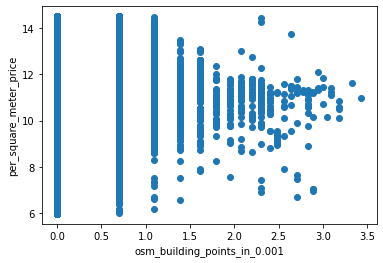

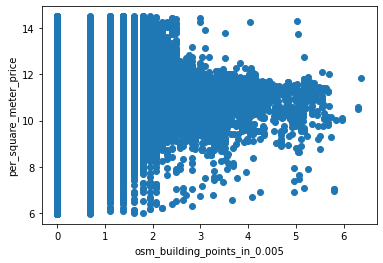

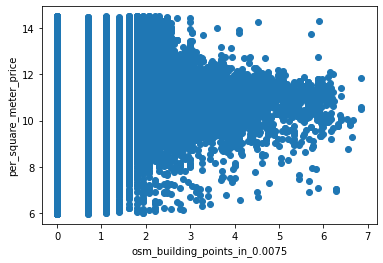

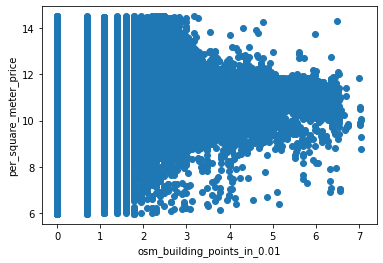

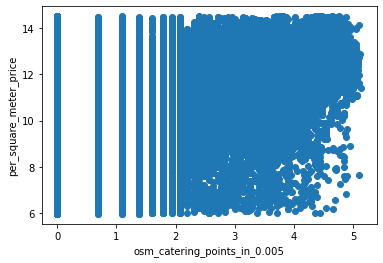

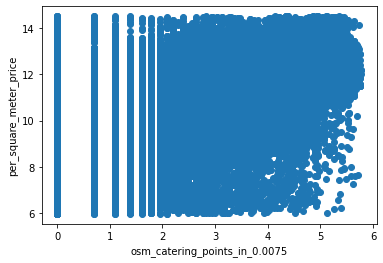

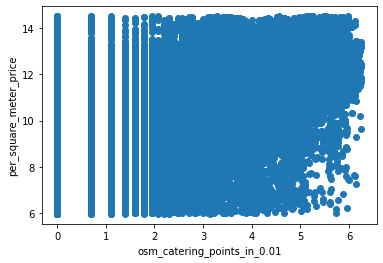

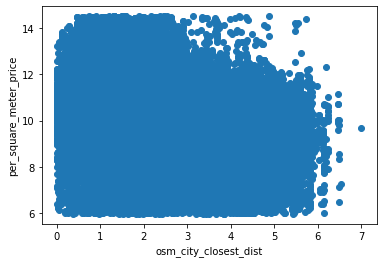

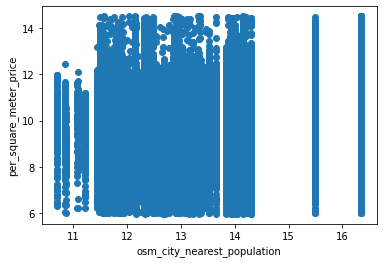

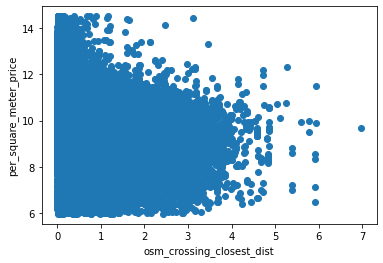

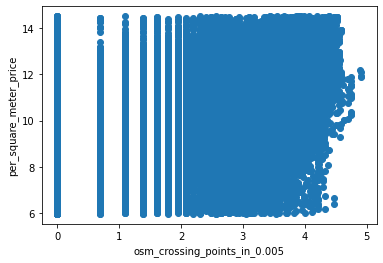

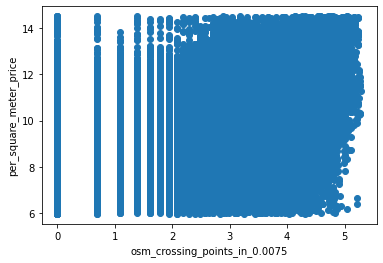

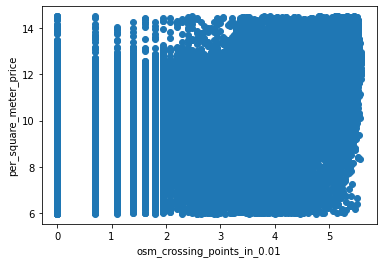

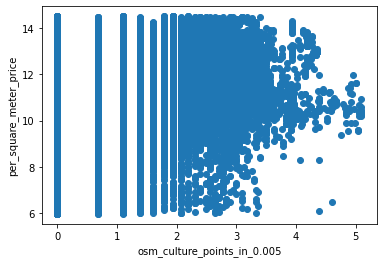

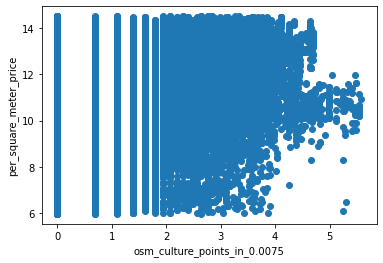

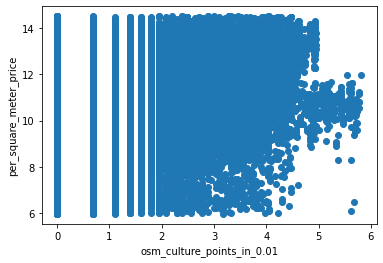

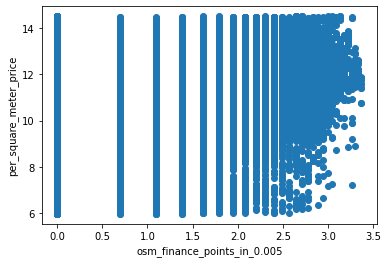

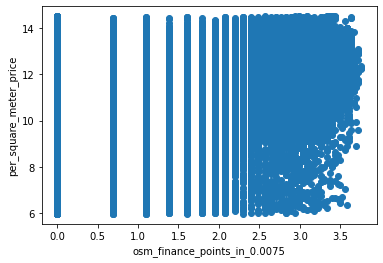

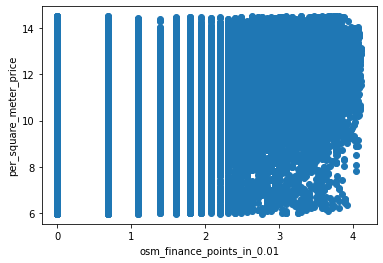

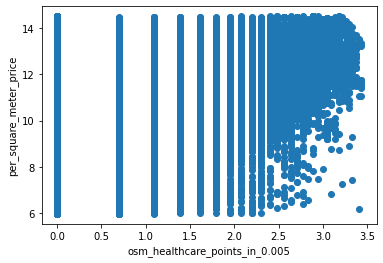

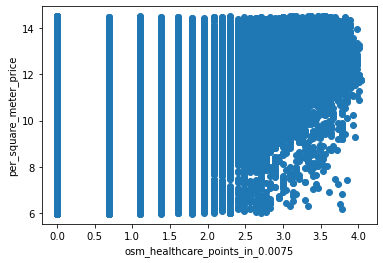

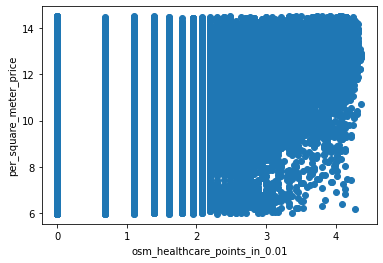

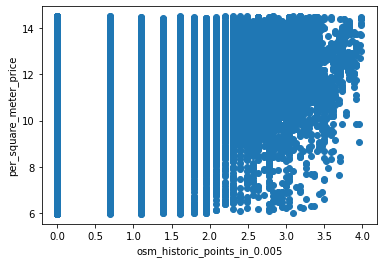

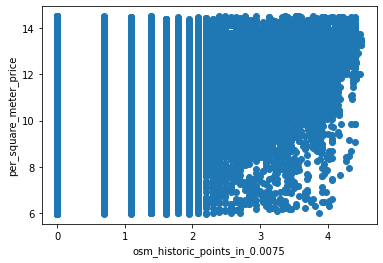

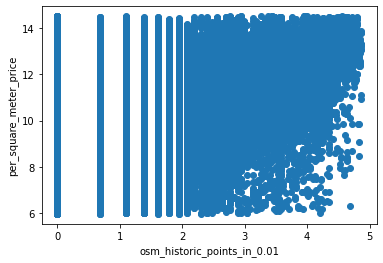

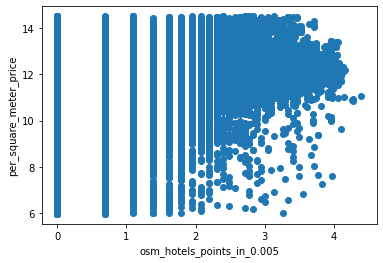

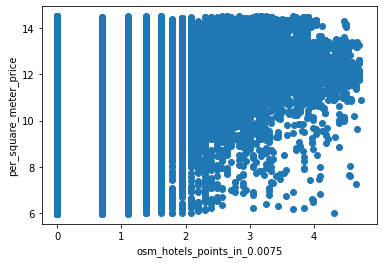

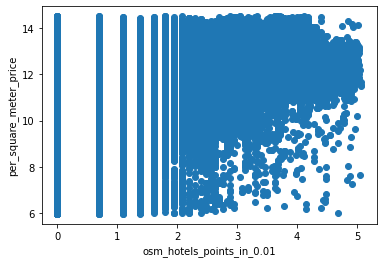

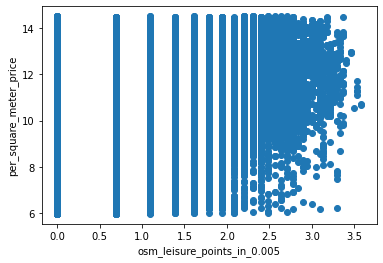

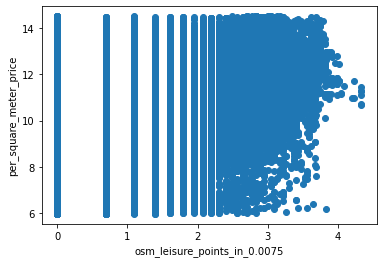

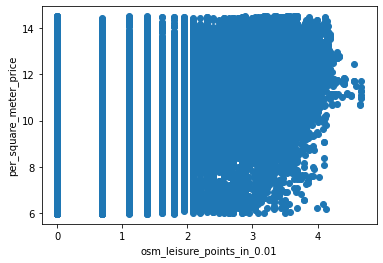

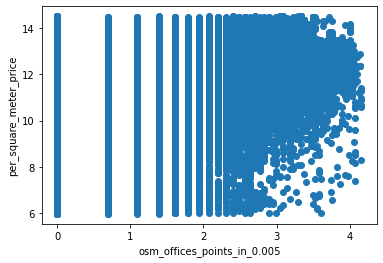

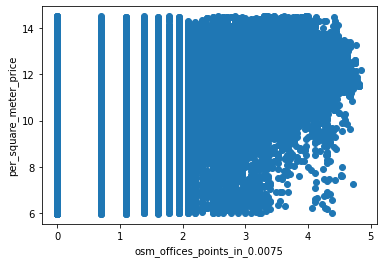

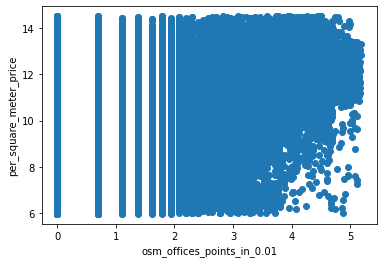

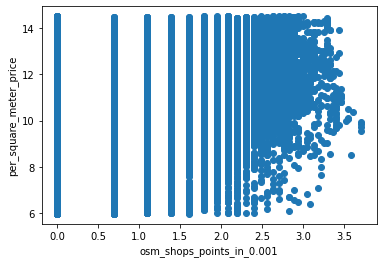

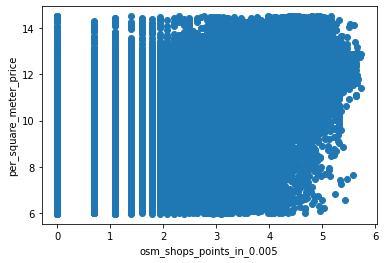

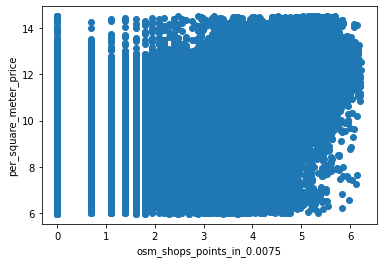

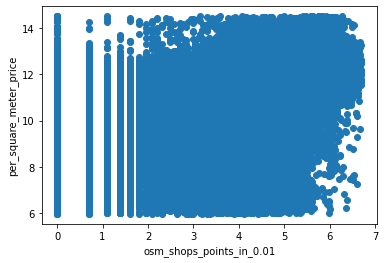

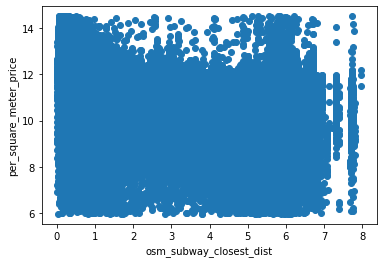

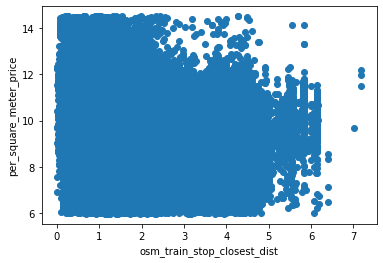

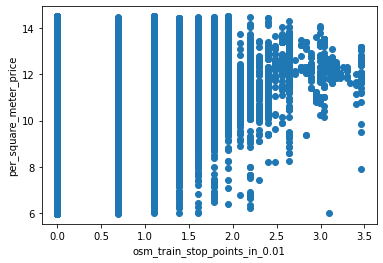

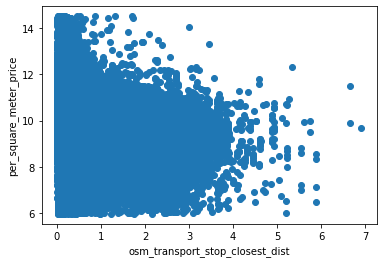

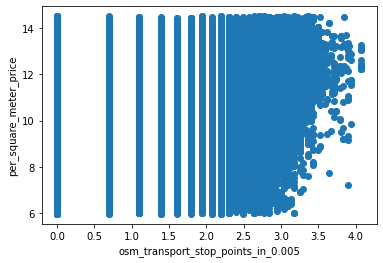

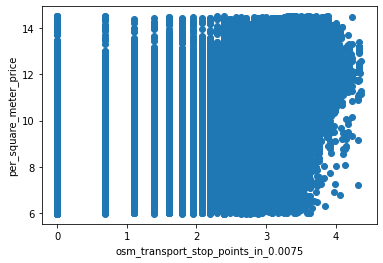

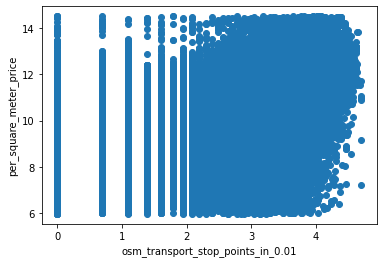

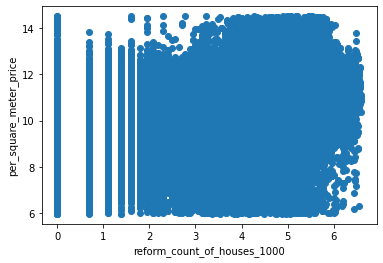

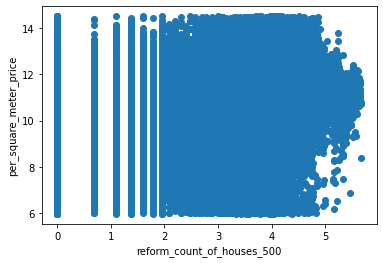

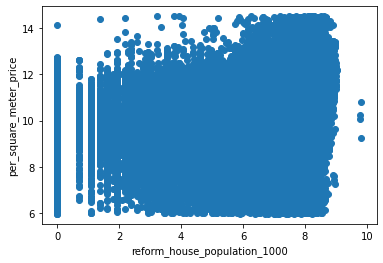

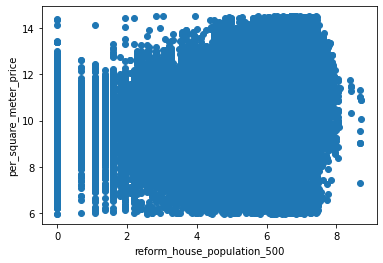

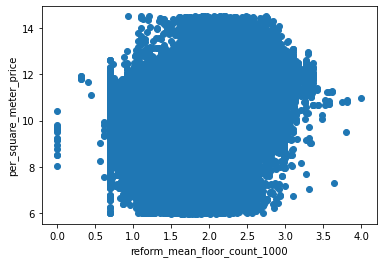

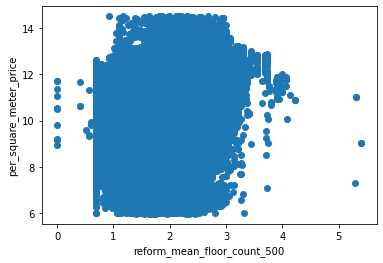

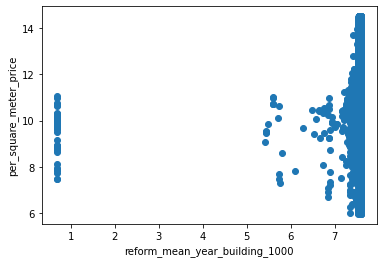

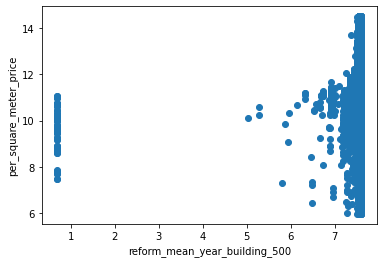

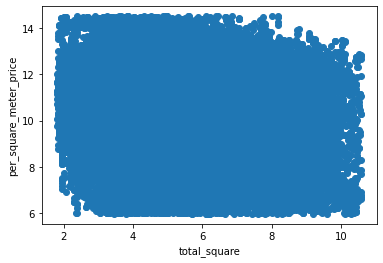

In [39]:
for feature in continous_feat:
    data=df.copy()
    data['per_square_meter_price']=np.log(data['per_square_meter_price']+1)
    data[feature]=np.log(data[feature]+1)
    plt.scatter(data[feature], data['per_square_meter_price'])
    plt.xlabel(feature)
    plt.ylabel('per_square_meter_price')
    plt.show()
    

Из рисунков выше видно, что с целевым признаком ничего не кореллирует напрямую

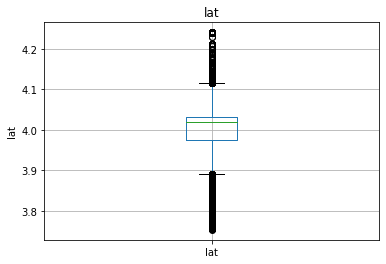

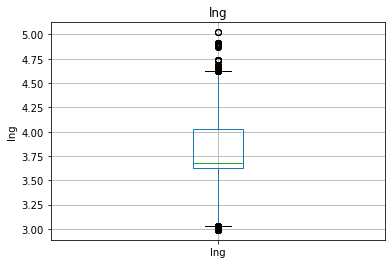

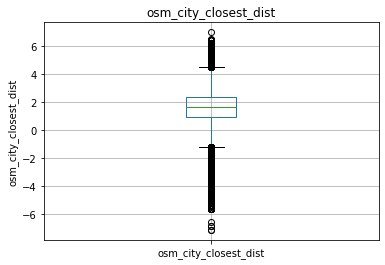

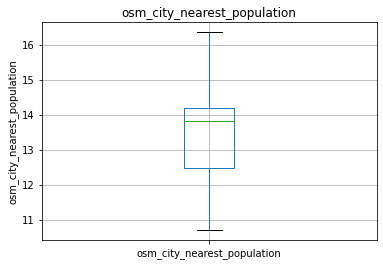

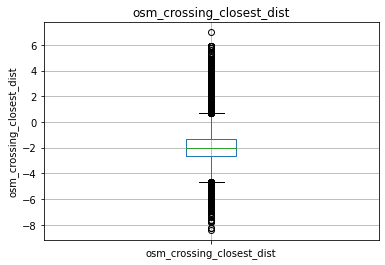

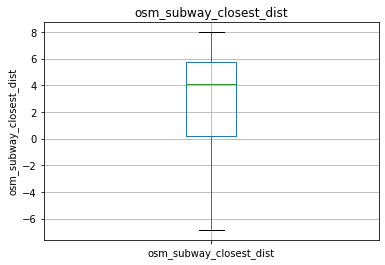

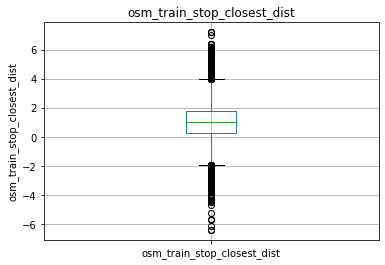

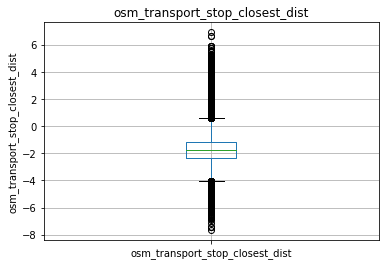

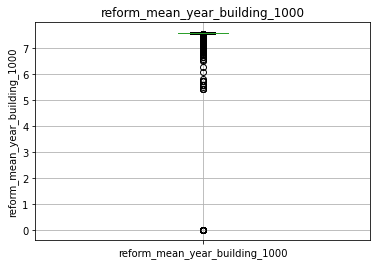

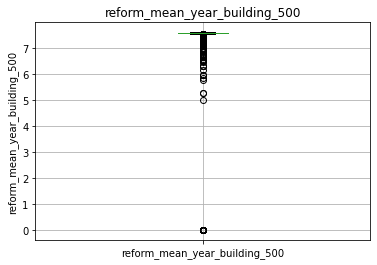

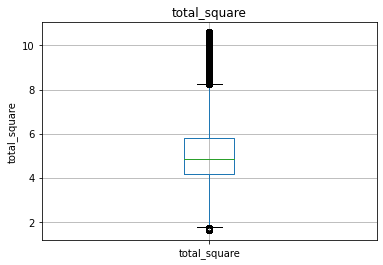

In [40]:
for feature in continous_feat:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

В данных много выбросов

Распределение целевого признака

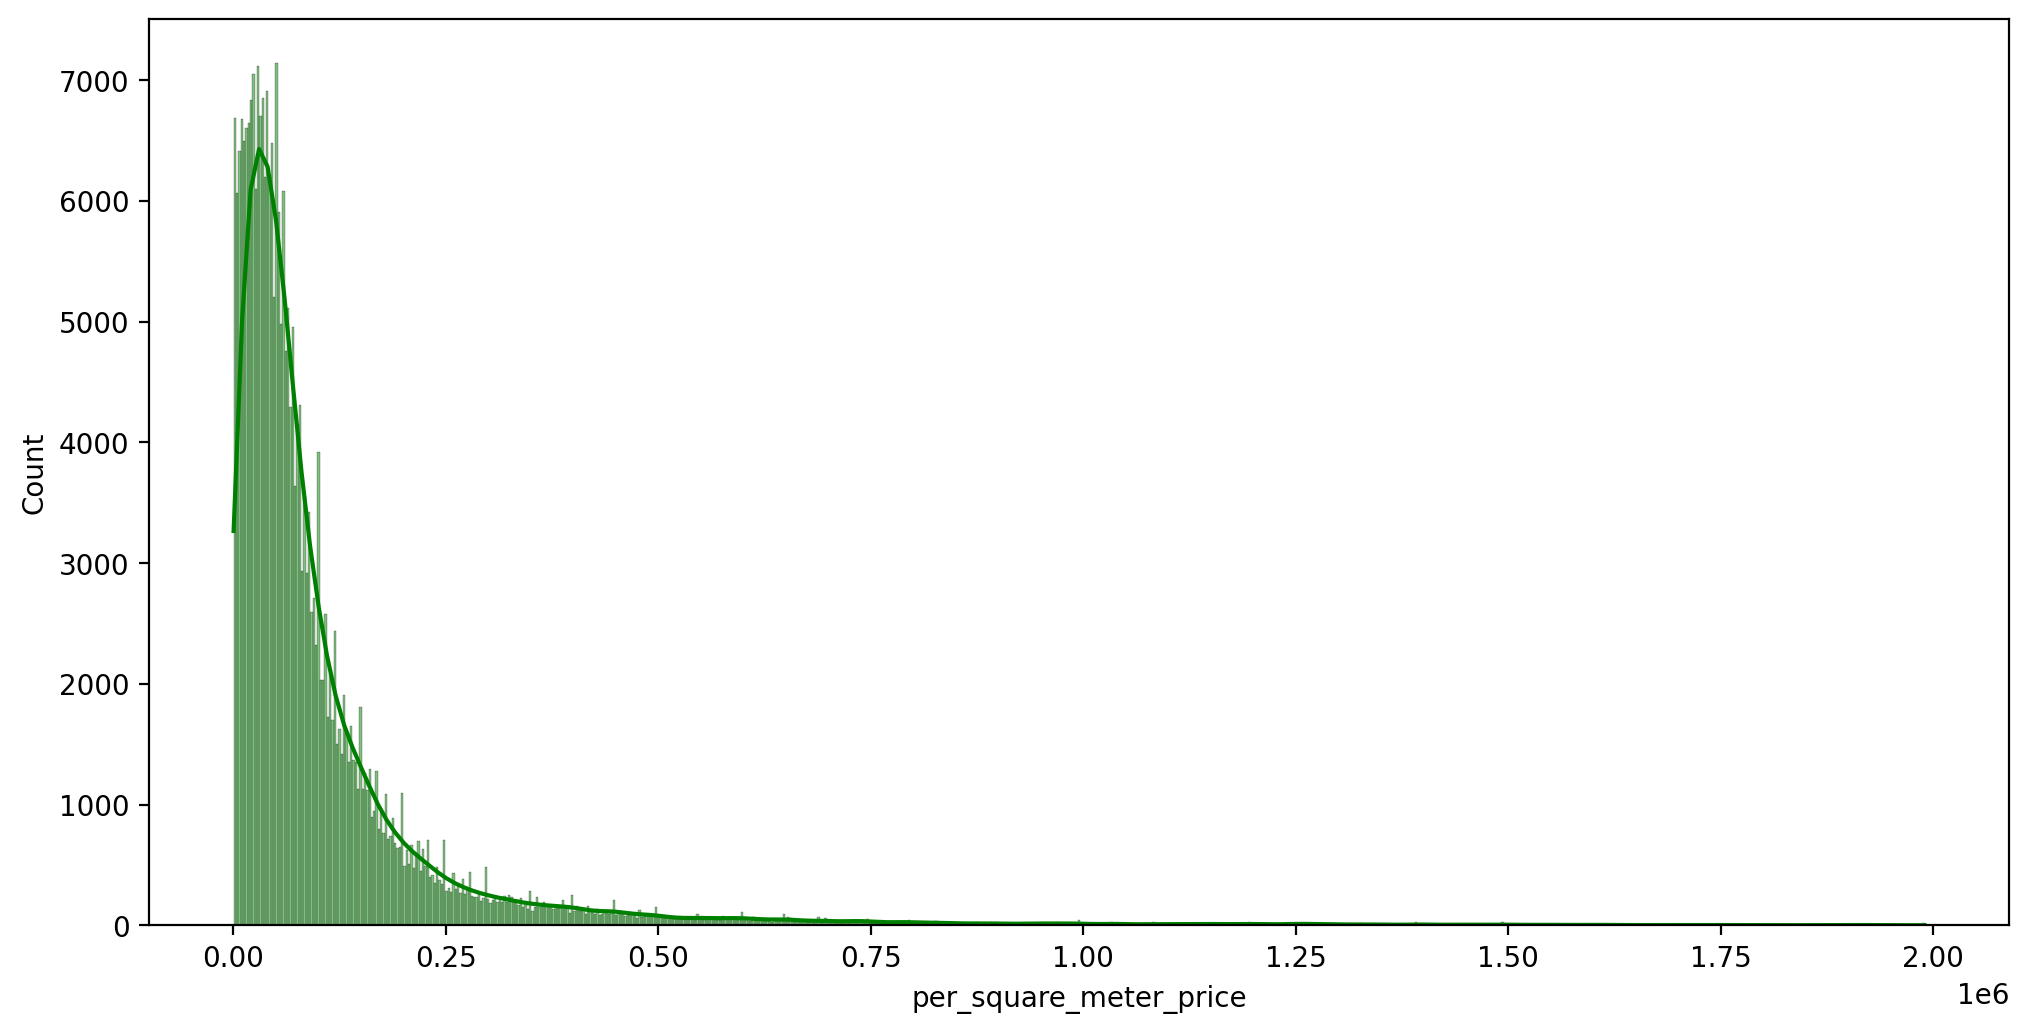

In [41]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(y_series,kde=True,color='g');

Корреляция

In [47]:
corrmat = df.corr()
corrmat.per_square_meter_price.sort_values(ascending=False).head(20)

per_square_meter_price               1.000000
osm_city_nearest_population          0.551891
osm_catering_points_in_0.005         0.489370
osm_amenity_points_in_0.005          0.483741
osm_amenity_points_in_0.01           0.476595
osm_amenity_points_in_0.0075         0.475630
osm_catering_points_in_0.0075        0.471668
osm_catering_points_in_0.01          0.463029
osm_leisure_points_in_0.01           0.462191
osm_healthcare_points_in_0.01        0.460384
osm_shops_points_in_0.01             0.440750
osm_healthcare_points_in_0.0075      0.440013
osm_amenity_points_in_0.001          0.437389
osm_shops_points_in_0.005            0.433042
osm_shops_points_in_0.0075           0.433007
osm_crossing_points_in_0.01          0.432438
osm_transport_stop_points_in_0.01    0.431762
osm_finance_points_in_0.01           0.428946
osm_catering_points_in_0.001         0.428338
osm_leisure_points_in_0.0075         0.420457
Name: per_square_meter_price, dtype: float64

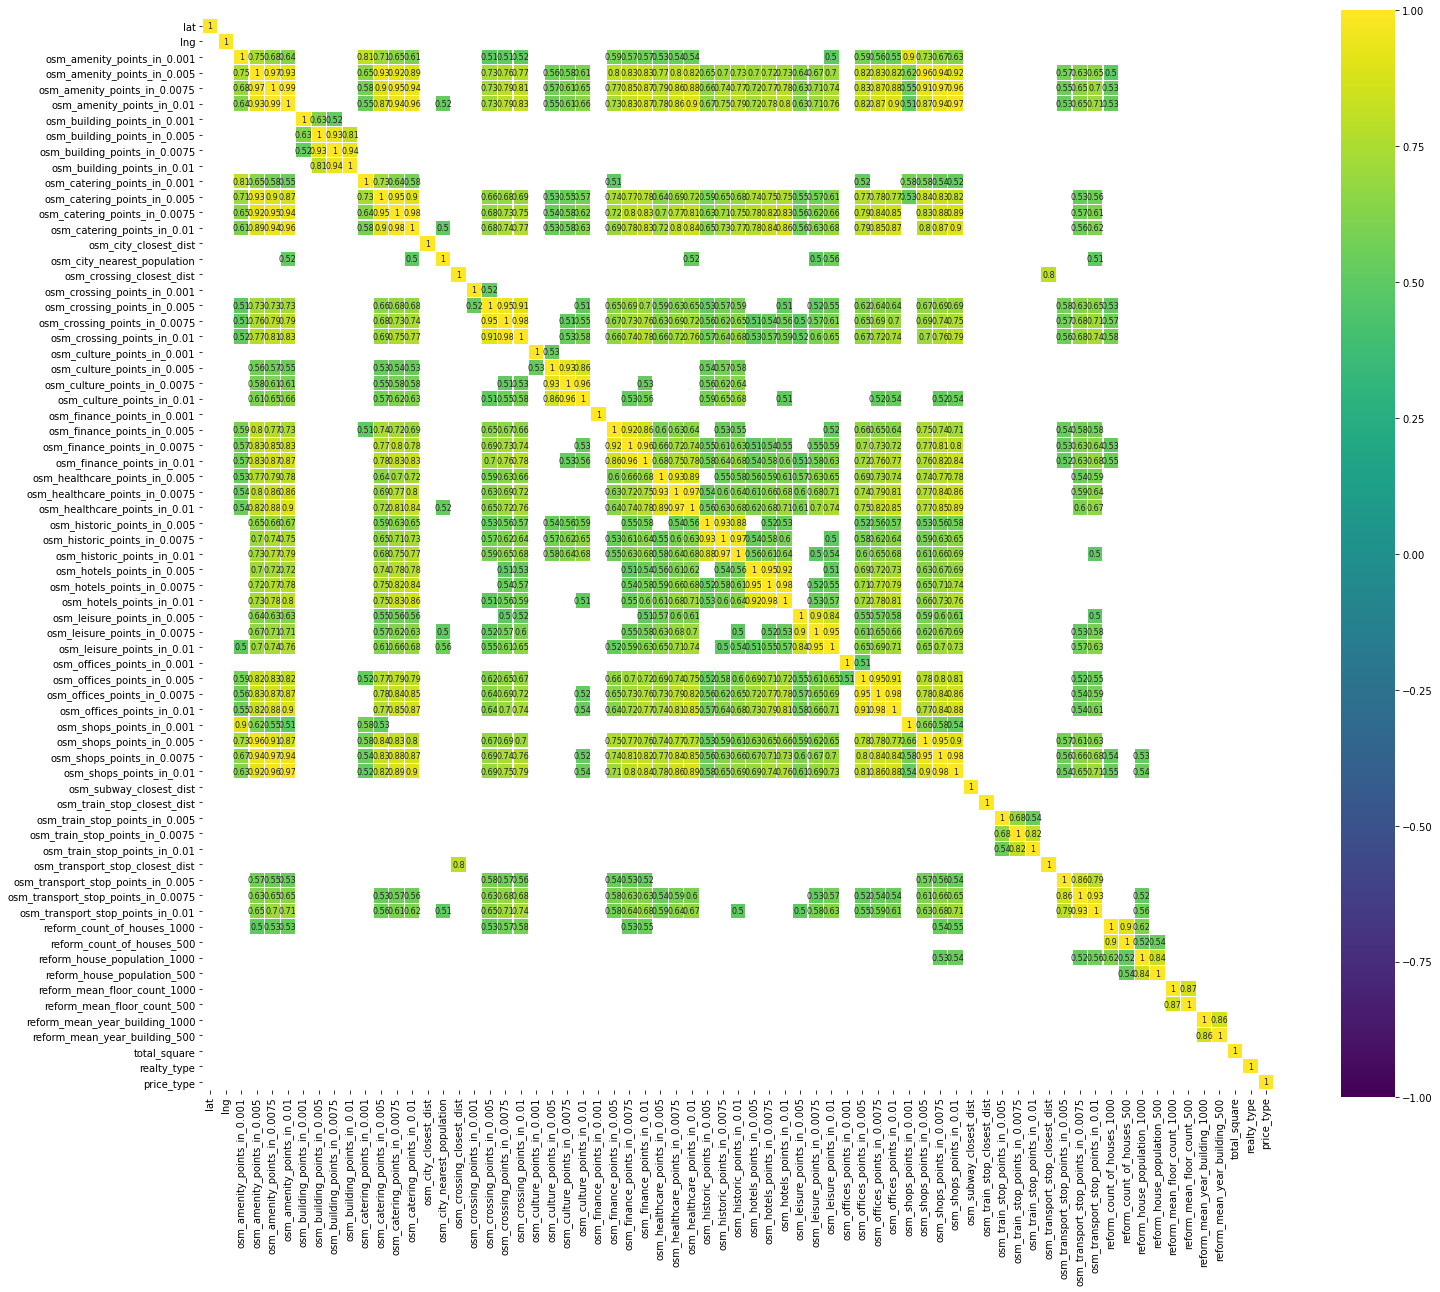

In [44]:
corr = X_df[numerical_feat].corr()
plt.figure(figsize=(24, 20))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

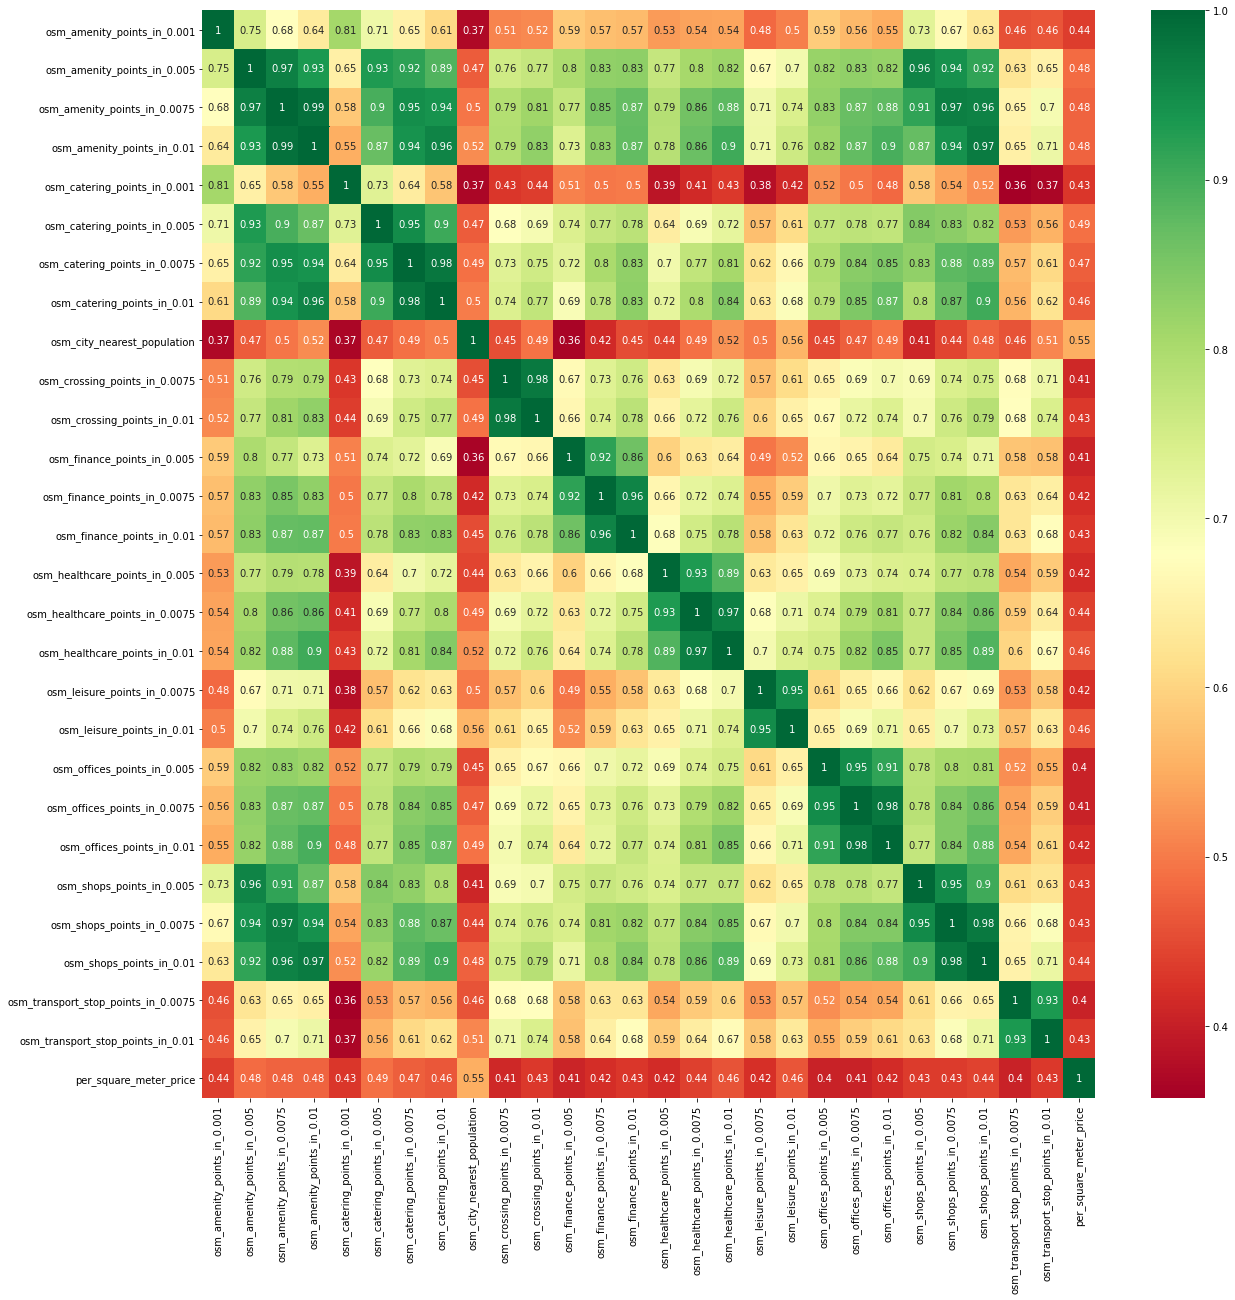

In [52]:
#Признаки корреляция которых с целевым признаком более 0.4 по модулю
top_corr_features = corrmat.index[abs(corrmat["per_square_meter_price"])>0.4]
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

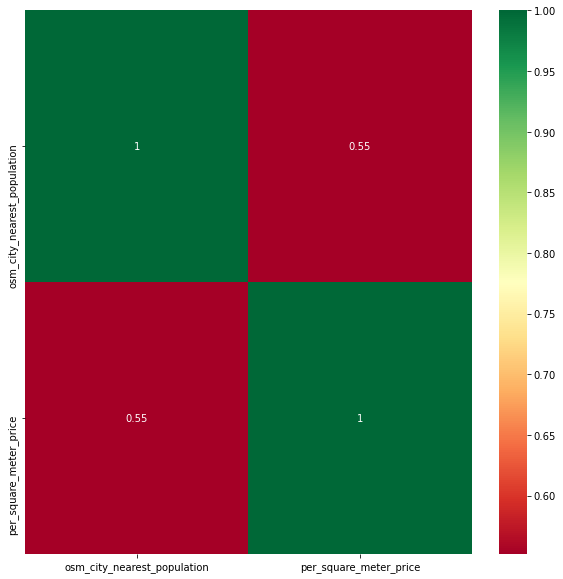

In [51]:
#Признаки корреляция которых с целевым признаком более 0.5 по модулю
top_corr_features = corrmat.index[abs(corrmat["per_square_meter_price"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [56]:
pd.options.display.max_rows

60

In [58]:
features_with_nan

['floor',
 'osm_city_nearest_population',
 'reform_house_population_1000',
 'reform_house_population_500',
 'reform_mean_floor_count_1000',
 'reform_mean_floor_count_500',
 'reform_mean_year_building_1000',
 'reform_mean_year_building_500',
 'street']

In [57]:
corrmat

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,...,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
lat,1.000000,0.066425,0.073198,0.097961,0.115137,0.127294,-0.085950,-0.138579,-0.162375,-0.186287,...,-0.088545,0.085053,0.032180,0.106710,0.081504,-0.071921,-0.059077,0.025977,-0.002996,0.033998
lng,0.066425,1.000000,-0.172165,-0.207912,-0.211640,-0.212397,-0.043032,-0.058937,-0.063648,-0.068164,...,0.017317,-0.024237,-0.015682,-0.154199,-0.124749,0.055807,0.049335,-0.022858,0.011912,0.114160
osm_amenity_points_in_0.001,0.073198,-0.172165,1.000000,0.745446,0.677788,0.638178,0.054976,0.033431,0.023449,0.021155,...,0.265627,0.289474,0.192795,-0.002240,-0.035548,-0.149751,-0.136117,0.000017,0.123926,0.028932
osm_amenity_points_in_0.005,0.097961,-0.207912,0.745446,1.000000,0.967254,0.932856,0.036544,0.043737,0.036835,0.033565,...,0.434188,0.438607,0.317132,-0.041825,-0.074846,-0.245400,-0.222168,0.004926,0.108557,0.046815
osm_amenity_points_in_0.0075,0.115137,-0.211640,0.677788,0.967254,1.000000,0.985065,0.034010,0.043548,0.039911,0.036551,...,0.445707,0.470388,0.330054,-0.042188,-0.072061,-0.263689,-0.235350,0.010866,0.102777,0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reform_mean_year_building_1000,-0.071921,0.055807,-0.149751,-0.245400,-0.263689,-0.270050,-0.007576,-0.005303,-0.002836,0.000199,...,-0.220269,-0.045101,0.020625,0.331784,0.305021,1.000000,0.860733,-0.025998,-0.045284,-0.014472
reform_mean_year_building_500,-0.059077,0.049335,-0.136117,-0.222168,-0.235350,-0.238410,-0.008781,-0.007718,-0.003890,0.000188,...,-0.203445,-0.018929,0.033932,0.283311,0.313549,0.860733,1.000000,-0.022935,-0.039000,-0.012717
total_square,0.025977,-0.022858,0.000017,0.004926,0.010866,0.015934,-0.002450,-0.000571,-0.000795,-0.001563,...,-0.071369,-0.042777,-0.064890,-0.012831,-0.008281,-0.025998,-0.022935,1.000000,0.012508,-0.006952
realty_type,-0.002996,0.011912,0.123926,0.108557,0.102777,0.100415,0.022361,0.021645,0.021721,0.023660,...,0.051638,0.088589,0.038486,-0.000871,-0.010655,-0.045284,-0.039000,0.012508,1.000000,0.007683


In [53]:
top_corr_features

Index(['osm_amenity_points_in_0.001', 'osm_amenity_points_in_0.005',
       'osm_amenity_points_in_0.0075', 'osm_amenity_points_in_0.01',
       'osm_catering_points_in_0.001', 'osm_catering_points_in_0.005',
       'osm_catering_points_in_0.0075', 'osm_catering_points_in_0.01',
       'osm_city_nearest_population', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_finance_points_in_0.005',
       'osm_finance_points_in_0.0075', 'osm_finance_points_in_0.01',
       'osm_healthcare_points_in_0.005', 'osm_healthcare_points_in_0.0075',
       'osm_healthcare_points_in_0.01', 'osm_leisure_points_in_0.0075',
       'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.005',
       'osm_offices_points_in_0.0075', 'osm_offices_points_in_0.01',
       'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075',
       'osm_shops_points_in_0.01', 'osm_transport_stop_points_in_0.0075',
       'osm_transport_stop_points_in_0.01', 'per_square_meter_price'],
      dtype='ob